# Course Enrollment

## This notebook will allow us to visualize how many people are enrolled in classes for each day in the week

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import pytz #timezone
import sys
sys.path.insert(0, '..')

In [2]:
filepath = './course_enrollment_sample_data.csv'
df = pd.read_csv(filepath)
#df

In [3]:
# Keep only the columns we care about
df = df[['Days','Start Time', 'End Time', 'Actual Enroll']]

In [4]:
# Convert to datetime type, only looking at the hours
df['End Time'] = pd.to_datetime(df['End Time']).dt.time
df['Start Time'] = pd.to_datetime(df['Start Time']).dt.time

In [5]:
# slice the datetime to get the hour and minutes and save them in a new column
df[['start_h','start_m']] = pd.DataFrame([(x.hour, x.minute) for x in df['Start Time']])
df[['end_h','end_m']] = pd.DataFrame([(x.hour, x.minute) for x in df['End Time']])
#df

In [6]:
# get the floor of the start time
# get the ceiling of the end time
for i, row in df.iterrows():
    df.at[i,'Start Time Hours'] = df.at[i,'start_h']
    
    if(df.at[i,'end_m'] > 0):
        df.at[i,'End Time Hours'] = df.at[i,'end_h'] + 1
    else:
        df.at[i,'End Time Hours'] = df.at[i,'end_h']

In [7]:
df = df[['Days','Start Time Hours', 'End Time Hours', 'Actual Enroll']]


In [8]:
#create a array of 24 numbers to represent the hours in a day
hours=[]
for i in range(0,24):
    hours.append(i)

In [9]:
#create 5 dictionaries, one for each day in the week
dict_hour = dict((elemt,0) for elemt in hours)
Mon_dict_hour = dict((elemt,0) for elemt in hours)
Tues_dict_hour = dict((elemt,0) for elemt in hours)
Wed_dict_hour = dict((elemt,0) for elemt in hours)
Thurs_dict_hour = dict((elemt,0) for elemt in hours)
Fri_dict_hour = dict((elemt,0) for elemt in hours)

In [10]:
for i, row in df.iterrows():
    length = int(df.at[i,'End Time Hours'] - df.at[i,'Start Time Hours'])
    time = int(df.at[i,'Start Time Hours'])
    
    for j in range(0,length):
        if "M" in df.at[i, 'Days']:
            Mon_dict_hour[time+j] += df.at[i,'Actual Enroll']
        if "T" in df.at[i, 'Days']:
            Tues_dict_hour[time+j] += df.at[i,'Actual Enroll']
        if "W" in df.at[i, 'Days']:
            Wed_dict_hour[time+j] += df.at[i,'Actual Enroll']
        if "R" in df.at[i, 'Days']:
            Thurs_dict_hour[time+j] += df.at[i,'Actual Enroll']
        if "F" in df.at[i, 'Days']:
            Fri_dict_hour[time+j] += df.at[i,'Actual Enroll']
        dict_hour[time+j] += df.at[i,'Actual Enroll']

In [11]:
# display the values of one of the dictionaries 
Wed_dict_hour

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 29,
 9: 231,
 10: 224,
 11: 477,
 12: 349,
 13: 418,
 14: 635,
 15: 274,
 16: 0,
 17: 0,
 18: 0,
 19: 90,
 20: 86,
 21: 83,
 22: 0,
 23: 0}

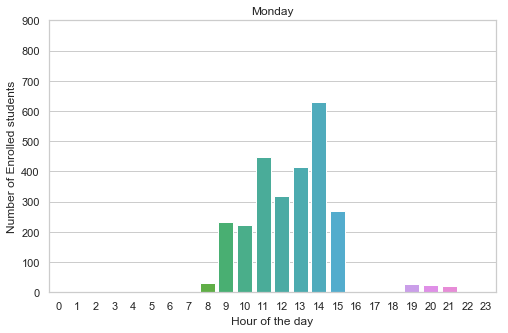

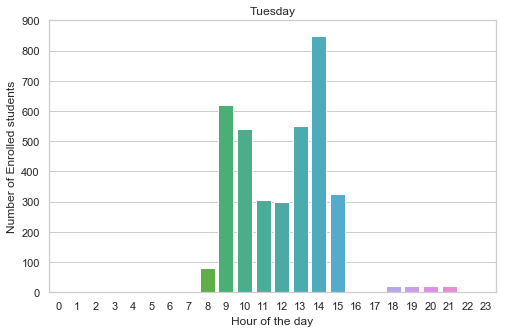

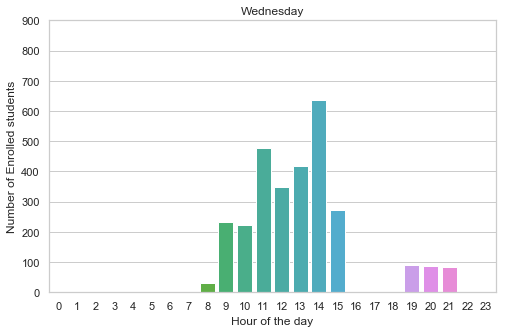

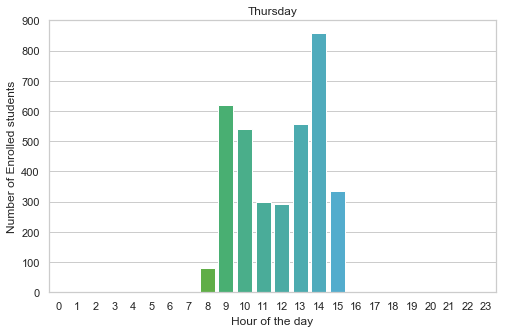

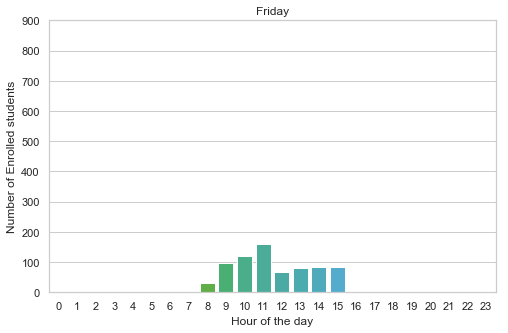

In [12]:
#graph plots for each day

#store the dictionaries in a array so we can easily loop through them
all_days = [Mon_dict_hour, Tues_dict_hour, Wed_dict_hour, Thurs_dict_hour, Fri_dict_hour]

#name of the graphs
all_days_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

#convert the keys of a dictionary to a list
hours24 = list(Mon_dict_hour.keys())

for i in range(0,5):
    #fig, ax = plt.subplots(figsize=(24, 15))
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_ylim(0,900)
    ax.set_title(all_days_names[i])
    ax.set_xlabel('Hour of the day')
    ax.set_ylabel('Number of Enrolled students')
    
    #convert the values of the dictionaries to a list
    total_enrollment = list(all_days[i].values())
    
    sns.barplot(
        # The hours (a number [0,23]) for each row.
        x= hours24,
        # The total enrollment at that hour.
        y= total_enrollment,
        ax=ax
    )
    
    #export each graph to a png
    plt.savefig('./{}.png'.format(all_days_names[i]))